<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Alphas/Market_Return_by_Dates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from my_library import *

13:57:42 Starting...
13:57:42 Installing yfinance into Google notebook...
13:57:45 Installing arch into Google notebook...
13:57:53 Initialized.


## Get the Data

In [40]:
data,ticker_name=download(ticker:='SPY',auto_adjust=True).xs(ticker,axis=1,level=1),'S&P 500 Index ETF'
data['Return']=data['Close'].pct_change()*hundred
data.columns.name=ticker_name
data.dropna(inplace=True)
data.index=list(map(lambda x:pd.Period(x,'D'),data.index))
data['Weekday']=data.index.weekday+1
data['Monthday']=data.index.day
data['DaysInMonth']=list(map(lambda x:pd.Period(x,'M').daysinmonth,data.index))
data['Month']=data.index.month
display(data)

[*********************100%***********************]  1 of 1 completed


S&P 500 Index ETF,Close,High,Low,Open,Volume,Return,Weekday,Monthday,DaysInMonth,Month
1993-02-01,24.626434,24.626434,24.469910,24.469910,480500,0.711192,1,1,28,2
1993-02-02,24.678600,24.695992,24.556860,24.609034,201300,0.211829,2,2,28,2
1993-02-03,24.939484,24.956875,24.696002,24.713393,529400,1.057124,3,3,28,2
1993-02-04,25.043827,25.096002,24.748171,25.026436,531500,0.418386,4,4,28,2
1993-02-05,25.026438,25.078612,24.887305,25.026438,492100,-0.069435,5,5,28,2
...,...,...,...,...,...,...,...,...,...,...
2025-04-10,524.580017,533.500000,509.320007,532.169983,162331200,-4.381900,4,10,30,4
2025-04-11,533.940002,536.429993,520.070007,523.010010,97866300,1.784282,5,11,30,4
2025-04-14,539.119995,544.280029,533.859985,544.049988,68034000,0.970145,1,14,30,4
2025-04-15,537.609985,543.229980,536.809998,539.669983,56628300,-0.280088,2,15,30,4


## Analyse Returns by Day of the Week
### First Just a Simple Grouped Mean

14:37:28 t Test for a Zero Mean


S&P 500 Index ETF,Mean,Std.Dev.,Count,Std.Err.,t Statistic,p Value
Day of Week,,,,,,
Monday,0.047250,1.292803,1523,0.033127,1.426331,0.153978
Tuesday,0.071262,1.173252,1665,0.028753,2.478412,0.013295
Wednesday,0.057832,1.147185,1663,0.028131,2.055813,0.039956
Thursday,0.014280,1.180172,1633,0.029205,0.488974,0.624926
Friday,0.033505,1.110541,1625,0.027549,1.216175,0.224095


14:37:29 Wrote plot to Average Returns of S&P 500 Index ETF by Day of the Week.png.


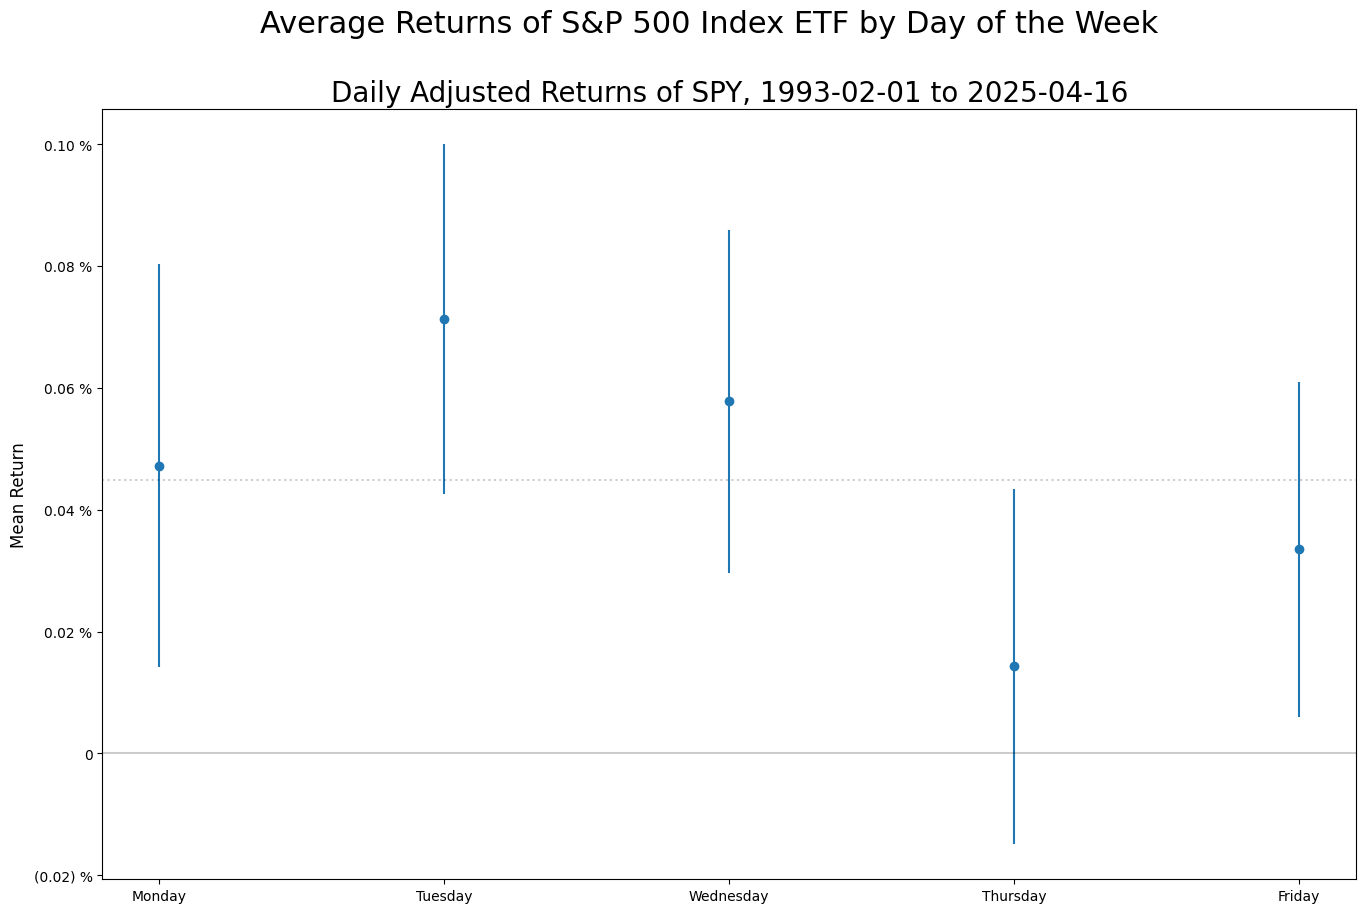

In [48]:
from scipy.stats import t as studentt
nprint("t Test for a Zero Mean")
results=(grouped:=data[['Return','Weekday']].groupby("Weekday")).mean().rename(columns={'Return':'Mean'})
results['Std.Dev.']=grouped.std()
results['Count']=grouped.count()
results['Std.Err.']=results['Std.Dev.']/np.sqrt(results['Count'])
results['t Statistic']=results['Mean']/results['Std.Err.']
results['p Value']=studentt.sf(np.abs(results['t Statistic']),results['Count']-1)*2
results.index=["Monday","Tuesday","Wednesday","Thursday","Friday"]
results.index.name='Day of Week'
display(results)

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x:=results.index,y:=results['Mean'],ye:=results['Std.Err.'],fmt='o')
plot.axhline(color='black',alpha=0.2)
plot.set_ylabel("Mean Return",fontsize=12)
plot.yaxis.set_major_formatter(PercentLabels(2))
plot.axhline(data['Return'].mean(),color='black',alpha=0.2,linestyle=':')
figure.suptitle(title:="Average Returns of {} by Day of the Week".format(ticker_name),fontsize=22)
plot.set_title(subtitle:="Daily Adjusted Returns of {}, {} to {}".format(ticker,data.index[0],data.index[-1]),fontsize=20)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
nprint("Wrote plot to {}.".format(filename))

### Now do an OLS with Indicator Variables
This will deliver *exactly* the same results as the grouped means, but with some other statistics for "free."